<a href="https://colab.research.google.com/github/rjlallana/YOLO/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar entorno de trabajo



## Preparar el dataset

Enlazar la sesion de Google Colab con nuestro Google Drive para que haya persistencia de datos.

In [ ]:
# google colab gpu
import torch
print(torch.cuda.get_device_name(torch.cuda.current_device()))
!rm -r /content/sample_data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # 4/1AX4XfWjWOj6Rt3kOTu3Hx3Ph9_4QX-JxgrVpwCoip7OYzYJkIliPPbKVkhs

Tesla P100-PCIE-16GB
Mounted at /content/gdrive


Copiar el dataset y con sus anotaciones ya en formato YOLO, a una carpeta dentro de Colab que llamaremos MAFAtoYOLO

In [ ]:
!cp -r /content/gdrive/MyDrive/PFG/dataset/MAFAtoYOLO /content

## Descargar el modelo YOLO

Fork del repositorio original de YOLOR. Se han echo unos pequeños cambios para que el codigo funcione en este entorno de trabajo de Google Colab+Drive.

In [ ]:
%cd /content
!git clone https://github.com/rjlallana/yolo.git
!pip install -qr yolo/requirements.txt  # clone repo
%cd /content/yolo/

/content
Cloning into 'yolo'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 513 (delta 42), reused 69 (delta 25), pack-reused 401
Receiving objects: 100% (513/513), 6.34 MiB | 22.32 MiB/s, done.
Resolving deltas: 100% (228/228), done.
     |████████████████████████████████| 596 kB 15.9 MB/s 
     |████████████████████████████████| 776.7 MB 4.6 kB/s 
     |████████████████████████████████| 12.7 MB 57.0 MB/s 
     |████████████████████████████████| 1.5 MB 57.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.
/content/yolo


## Archivo de configuaracion del Dataset

Este archivo YAML describe la estructura de directorios del dataset.
* Cada ruta en train, val, test lleva a una carpeta con un fichero de texto con las rutas las imagenes que usa.
* El numero de clases (nc)
* Y una lista de los nombres de las clases


In [ ]:
!cat /content/yolo/data/mafa.yaml

train: /content/MAFAtoYOLO/train/
val: /content/MAFAtoYOLO/valid/
test: /content/MAFAtoYOLO/test/

nc: 3
names: ['Mask incorrect', 'Mask', 'No mask']

# Entrenar el modelo para nuestro dataset

Usaremos la herramienta online [wandb](https://wandb.ai/site) para recoger todos las metricas de nuestro modelo y poder visualizarlas mas tarde. 

In [ ]:
# W&B API key: b
%cd /content/yolo
!pip --q install wandb # 696f46df5e9522567491751edf52abd152560a33
!wandb login

/content/yolo
     |████████████████████████████████| 1.7 MB 12.9 MB/s 
     |████████████████████████████████| 181 kB 26.3 MB/s 
     |████████████████████████████████| 144 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Pesos de la red entrenados en el dataset COCO para hacer transferencia de aprendizaje

In [ ]:
!cp /content/gdrive/MyDrive/PFG/yolor_csp.pt /content/yolo/weights
!cp /content/gdrive/MyDrive/PFG/yolor_p6.pt /content/yolo/weights

## Entranamiento de nuestro Modelo para el dataset MAFA
A continuacion explicacmos cada parametro:

    --img: Tamaño de la imagen de entrada. 
    --batch: Agrupar imágenes de entrada en lotes (batches) y hacer descenso de gradiente a la media del grupo de errores.
    --epochs: Número total de veces que el modelo cambia sus pesos.
    --data: Archivo que define la estructura de la fuente de datos.
    --cfg: Archivo que define la arquitectura YOLO elegida.
    --weights: Pesos iniciales que usa el modelo.
    --hyp: Hyperparámetros del modelo.
    --project: Ruta donde se guardan los datos y pesos del entranamiento.
    --name: Nombre del directorio del proyecto.

In [ ]:
%cd /content/yolo
!python train.py \
  --img 640 \
  --batch 12 \
  --epochs 300 \
  --data 'data/mafa.yaml' \
  --weights 'weights/yolor_csp.pt' \
  --hyp 'data/hyp.scratch.640.yaml' \
  --cfg '/cfg/yolor_csp.cfg' \
  --project '/content/gdrive/MyDrive/PFG' \
  --name "yolor_csp"

/content/yolo
Print OPT Namespace(adam=False, batch_size=12, bucket='', cache_images=False, cfg='/cfg/yolor_csp.cfg', data='data/mafa.yaml', device='', epochs=300, evolve=False, exist_ok=False, hyp='data/hyp.scratch.640.yaml', image_weights=False, img_size=[640], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_csp', noautoanchor=False, nosave=False, notest=False, project='/content/gdrive/MyDrive/PFG', rect=False, resume=False, single_cls=False, sync_bn=False, weights='weights/yolor_csp.pt', workers=8)
Using torch 1.7.0 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=12, bucket='', cache_images=False, cfg='./cfg/yolor_csp.cfg', data='data/mafa.yaml', device='', epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.640.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_csp', noautoanchor=False, nosave=False, notest=False, project='/content/gdrive/MyDrive/PFG', rect=False, resume=Fal

# Resultados obtenidos

In [ ]:
!wandb disabled

W&B disabled.


Probar el modelo en el conjunto de test

In [ ]:
%cd /content/yolo
!python test.py \
  --task 'val' \
  --verbose \
  --img 640 \
  --batch 12 \
  --data 'data/mafa.yaml' \
  --weights '/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt' \
  --cfg 'cfg/yolor_csp.cfg' \
  --project '/content/gdrive/MyDrive/PFG' \
  --name "yolor_csp" \
  --names 'data/mafa.names' \
  --exist-ok \
  --save-txt \
  --save-conf

/content/yolo
Namespace(augment=False, batch_size=12, cfg='cfg/yolor_csp.cfg', conf_thres=0.001, data='data/mafa.yaml', device='', exist_ok=True, img_size=640, iou_thres=0.65, name='yolor_csp', names='data/mafa.names', project='/content/gdrive/MyDrive/PFG', save_conf=True, save_json=False, save_txt=True, single_cls=False, task='val', verbose=True, weights=['/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'])
Using torch 1.7.0 CUDA:0 (Tesla T4, 15109MB)

Model Summary: 529 layers, 52923994 parameters, 52923994 gradients, 120.636808800 GFLOPS
Scanning images: 100% 169/169 [00:00<00:00, 912.91it/s]
Scanning labels /content/MAFAtoYOLO/valid/labels.cache3 (169 found, 0 missing, 0 empty, 0 duplicate, for 169 images): 169it [00:00, 14913.79it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 15/15 [01:00<00:00,  4.04s/it]
                 all         169         850       0.563        0.79       0.758       0.522
      Mask incorrect   

In [ ]:
%cd /content/yolo
!python test.py \
  --task 'test' \
  --verbose \
  --img 640 \
  --batch 12 \
  --data 'data/mafa.yaml' \
  --weights '/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt' \
  --cfg 'cfg/yolor_csp.cfg' \
  --project '/content/gdrive/MyDrive/PFG' \
  --name "yolor_csp" \
  --names 'data/mafa.names' \
  --exist-ok \
  --save-txt \
  --save-conf

/content/yolo
Namespace(augment=False, batch_size=12, cfg='cfg/yolor_csp.cfg', conf_thres=0.001, data='data/mafa.yaml', device='', exist_ok=True, img_size=640, iou_thres=0.65, name='yolor_csp', names='data/mafa.names', project='/content/gdrive/MyDrive/PFG', save_conf=True, save_json=False, save_txt=True, single_cls=False, task='test', verbose=True, weights=['/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'])
Using torch 1.7.0 CUDA:0 (Tesla T4, 15109MB)

Model Summary: 529 layers, 52923994 parameters, 52923994 gradients, 120.636808800 GFLOPS
Scanning labels /content/MAFAtoYOLO/test/labels.cache3 (85 found, 0 missing, 0 empty, 0 duplicate, for 85 images): 85it [00:00, 14174.45it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 8/8 [00:08<00:00,  1.04s/it]
                 all          85         334       0.618       0.903       0.899       0.664
      Mask incorrect          85          15        0.33         0.8       0.783    

In [ ]:
# Ejecucion en GPU P100
!python detect.py \
  --name 'data/mafa.names' \
  --source '/content/MAFAtoYOLO/test/images' \
  --img 640 \
  --conf 0.4 \
  --iou 0.65 \
  --device 0 \
  --cfg 'cfg/yolor_csp.cfg'  \
  --weights '/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_csp.cfg', classes=None, conf_thres=0.25, device='0', img_size=640, iou_thres=0.65, names='data/mafa.names', output='inference/output', save_txt=False, source='/content/MAFAtoYOLO/test/images', update=False, view_img=False, weights=['/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'])
image 1/1098 /content/MAFAtoYOLO/test/images/test_00000003.jpg: 384x640 1 Masks, 1 No masks, Done. (0.028s)
image 2/1098 /content/MAFAtoYOLO/test/images/test_00000021.jpg: 576x640 2 Masks, Done. (0.032s)
image 3/1098 /content/MAFAtoYOLO/test/images/test_00000042.jpg: 384x640 1 Masks, 2 No masks, Done. (0.028s)
image 4/1098 /content/MAFAtoYOLO/test/images/test_00000043.jpg: 384x640 1 Mask incorrects, 5 Masks, 6 No masks, Done. (0.026s)
image 5/1098 /content/MAFAtoYOLO/test/images/test_00000049.jpg: 512x640 1 Masks, Done. (0.027s)
image 6/1098 /content/MAFAtoYOLO/test/images/test_00000114.jpg: 448x640 1 Masks, Done. (0.026s)
image 7/1098 /conte

In [ ]:
# T4
%cd /content/yolo/
!python detect.py \
  --name 'data/mafa.names' \
  --source '/content/MAFAtoYOLO/test/images' \
  --img 640 \
  --conf 0.4 \
  --iou 0.65 \
  --device 0 \
  --cfg 'cfg/yolor_csp.cfg'  \
  --weights '/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'

/content/yolo
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_csp.cfg', classes=None, conf_thres=0.4, device='0', img_size=640, iou_thres=0.65, names='data/mafa.names', output='inference/output', save_txt=False, source='/content/MAFAtoYOLO/test/images', update=False, view_img=False, weights=['/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'])
image 1/1098 /content/MAFAtoYOLO/test/images/test_00000003.jpg: 384x640 1 Masks, 1 No masks, Done. (0.028s)
image 2/1098 /content/MAFAtoYOLO/test/images/test_00000021.jpg: 576x640 2 Masks, Done. (0.035s)
image 3/1098 /content/MAFAtoYOLO/test/images/test_00000042.jpg: 384x640 1 Masks, 2 No masks, Done. (0.028s)
image 4/1098 /content/MAFAtoYOLO/test/images/test_00000043.jpg: 384x640 5 Masks, 6 No masks, Done. (0.028s)
image 5/1098 /content/MAFAtoYOLO/test/images/test_00000049.jpg: 512x640 1 Masks, Done. (0.030s)
image 6/1098 /content/MAFAtoYOLO/test/images/test_00000114.jpg: 448x640 1 Masks, Done. (0.024s)
image 7/1098 /content/MAF

# Ejemplos con imagenes de transporte público de Madrid y conjunto de test.

In [ ]:
%cd /content/yolo/
!python detect.py \
  --name 'data/mafa.names' \
  --source 'ejemplos/' \
  --img 640 \
  --conf 0.2 \
  --device 0 \
  --cfg 'cfg/yolor_csp.cfg'  \
  --weights '/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'

/content/yolo
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_csp.cfg', classes=None, conf_thres=0.2, device='0', img_size=640, iou_thres=0.5, names='data/mafa.names', output='inference/output', save_txt=False, source='ejemplos/', update=False, view_img=False, weights=['/content/gdrive/MyDrive/PFG/yolor_csp/weights/best.pt'])
image 1/8 /content/yolo/ejemplos/000b7b75-1600.jpg: 384x640 1 Mask incorrects, 8 Masks, 2 No masks, Done. (0.028s)
image 2/8 /content/yolo/ejemplos/0602623232127-web-tete.jpg: 384x640 3 Mask incorrects, 7 Masks, 9 No masks, Done. (0.028s)
image 3/8 /content/yolo/ejemplos/0_8w7mkX-PHcfMM5s6.jpg: 448x640 109 Masks, 19 No masks, Done. (0.029s)
image 4/8 /content/yolo/ejemplos/200123110153-01-coronavirus-super-169.jpg: 384x640 2 Mask incorrects, 20 Masks, 2 No masks, Done. (0.028s)
image 5/8 /content/yolo/ejemplos/5-o.jpeg: 384x640 47 Masks, 38 No masks, Done. (0.028s)
image 6/8 /content/yolo/ejemplos/7-o.jpg: 448x640 88 Masks, 25 No masks, Done. (0.029s)


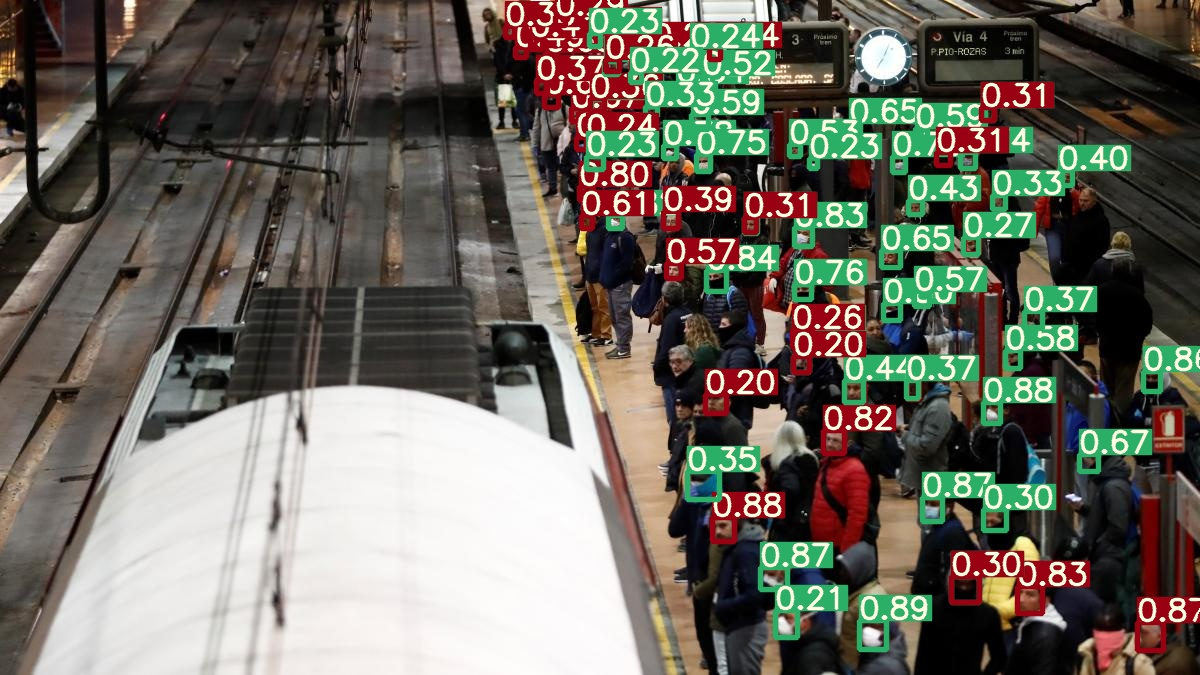

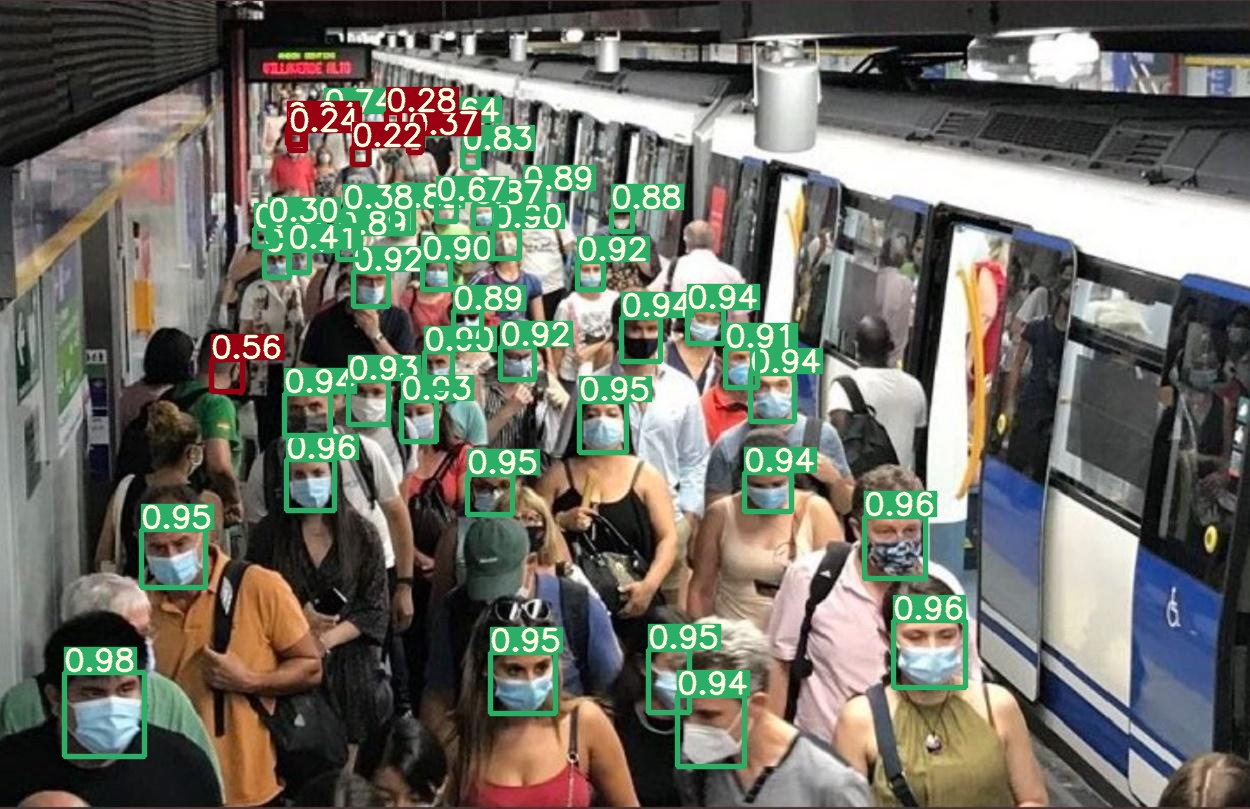

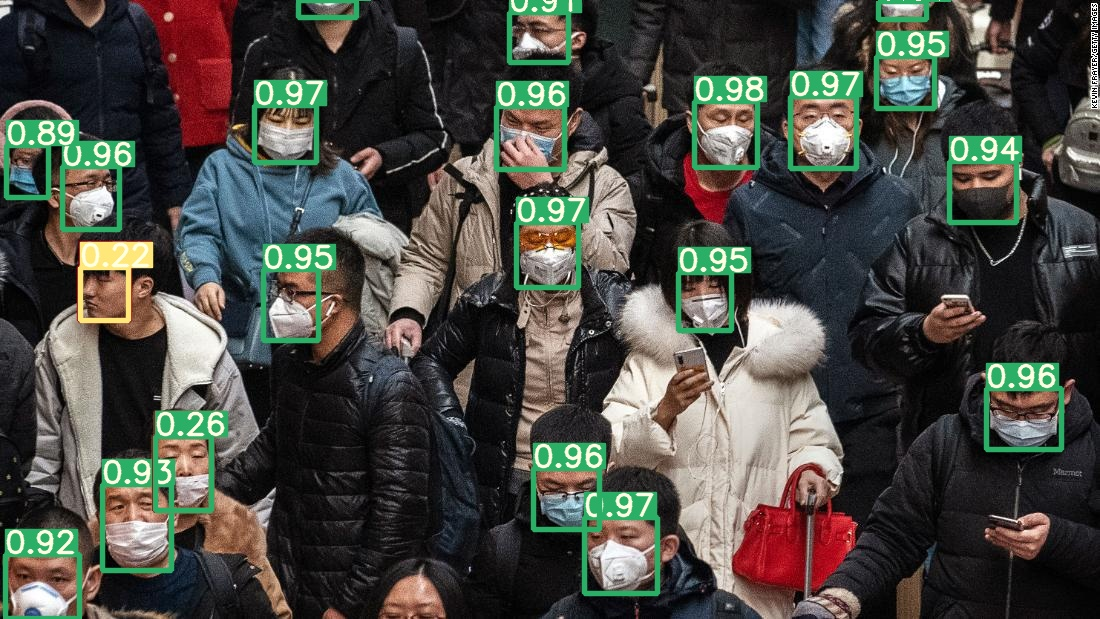

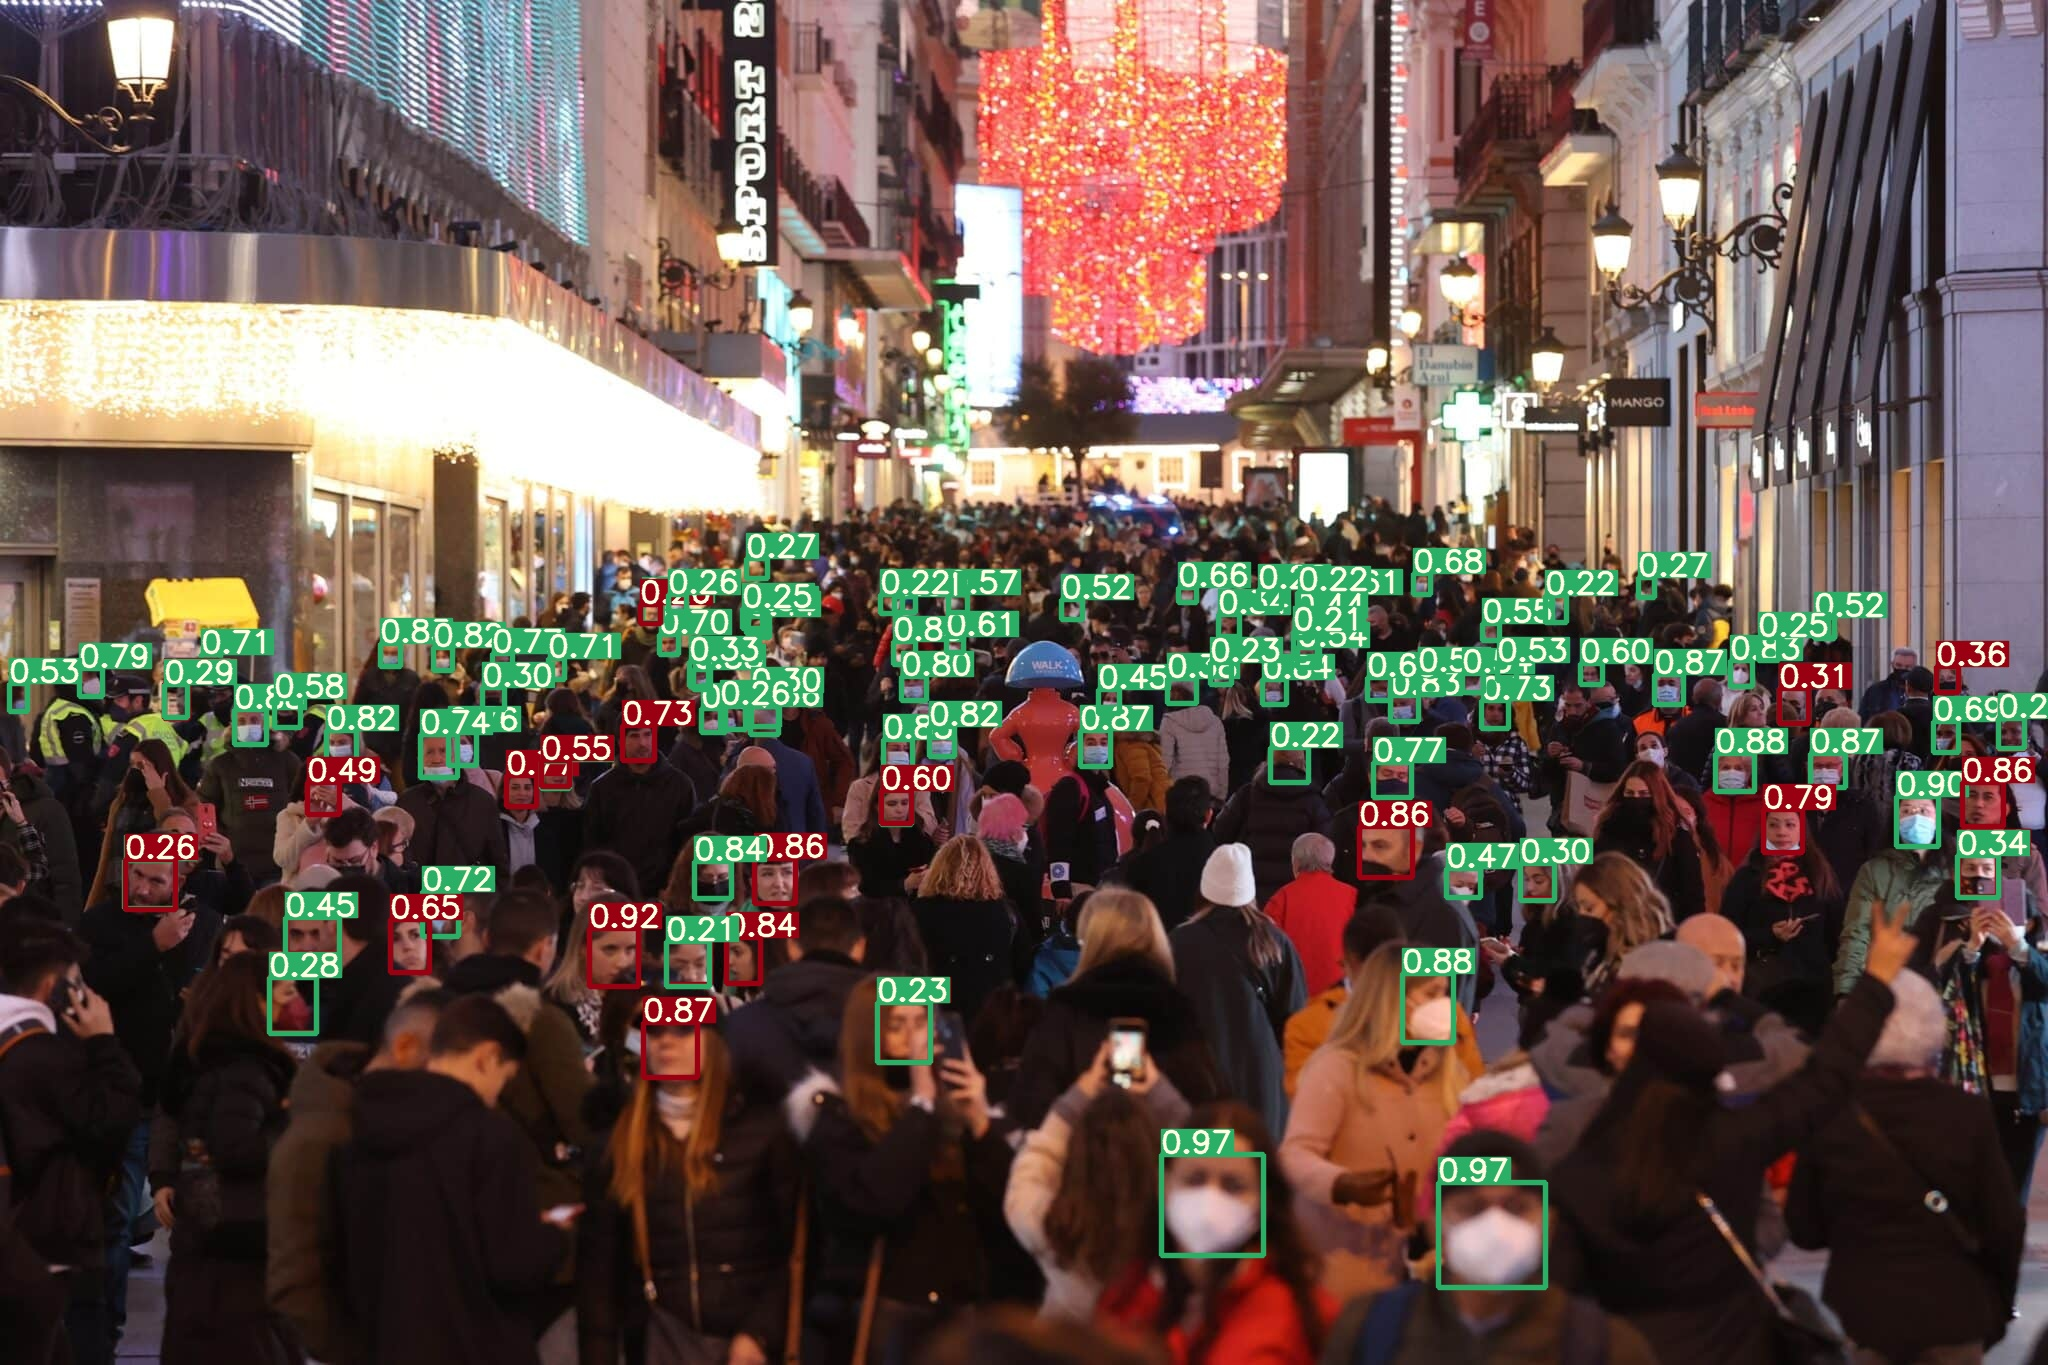

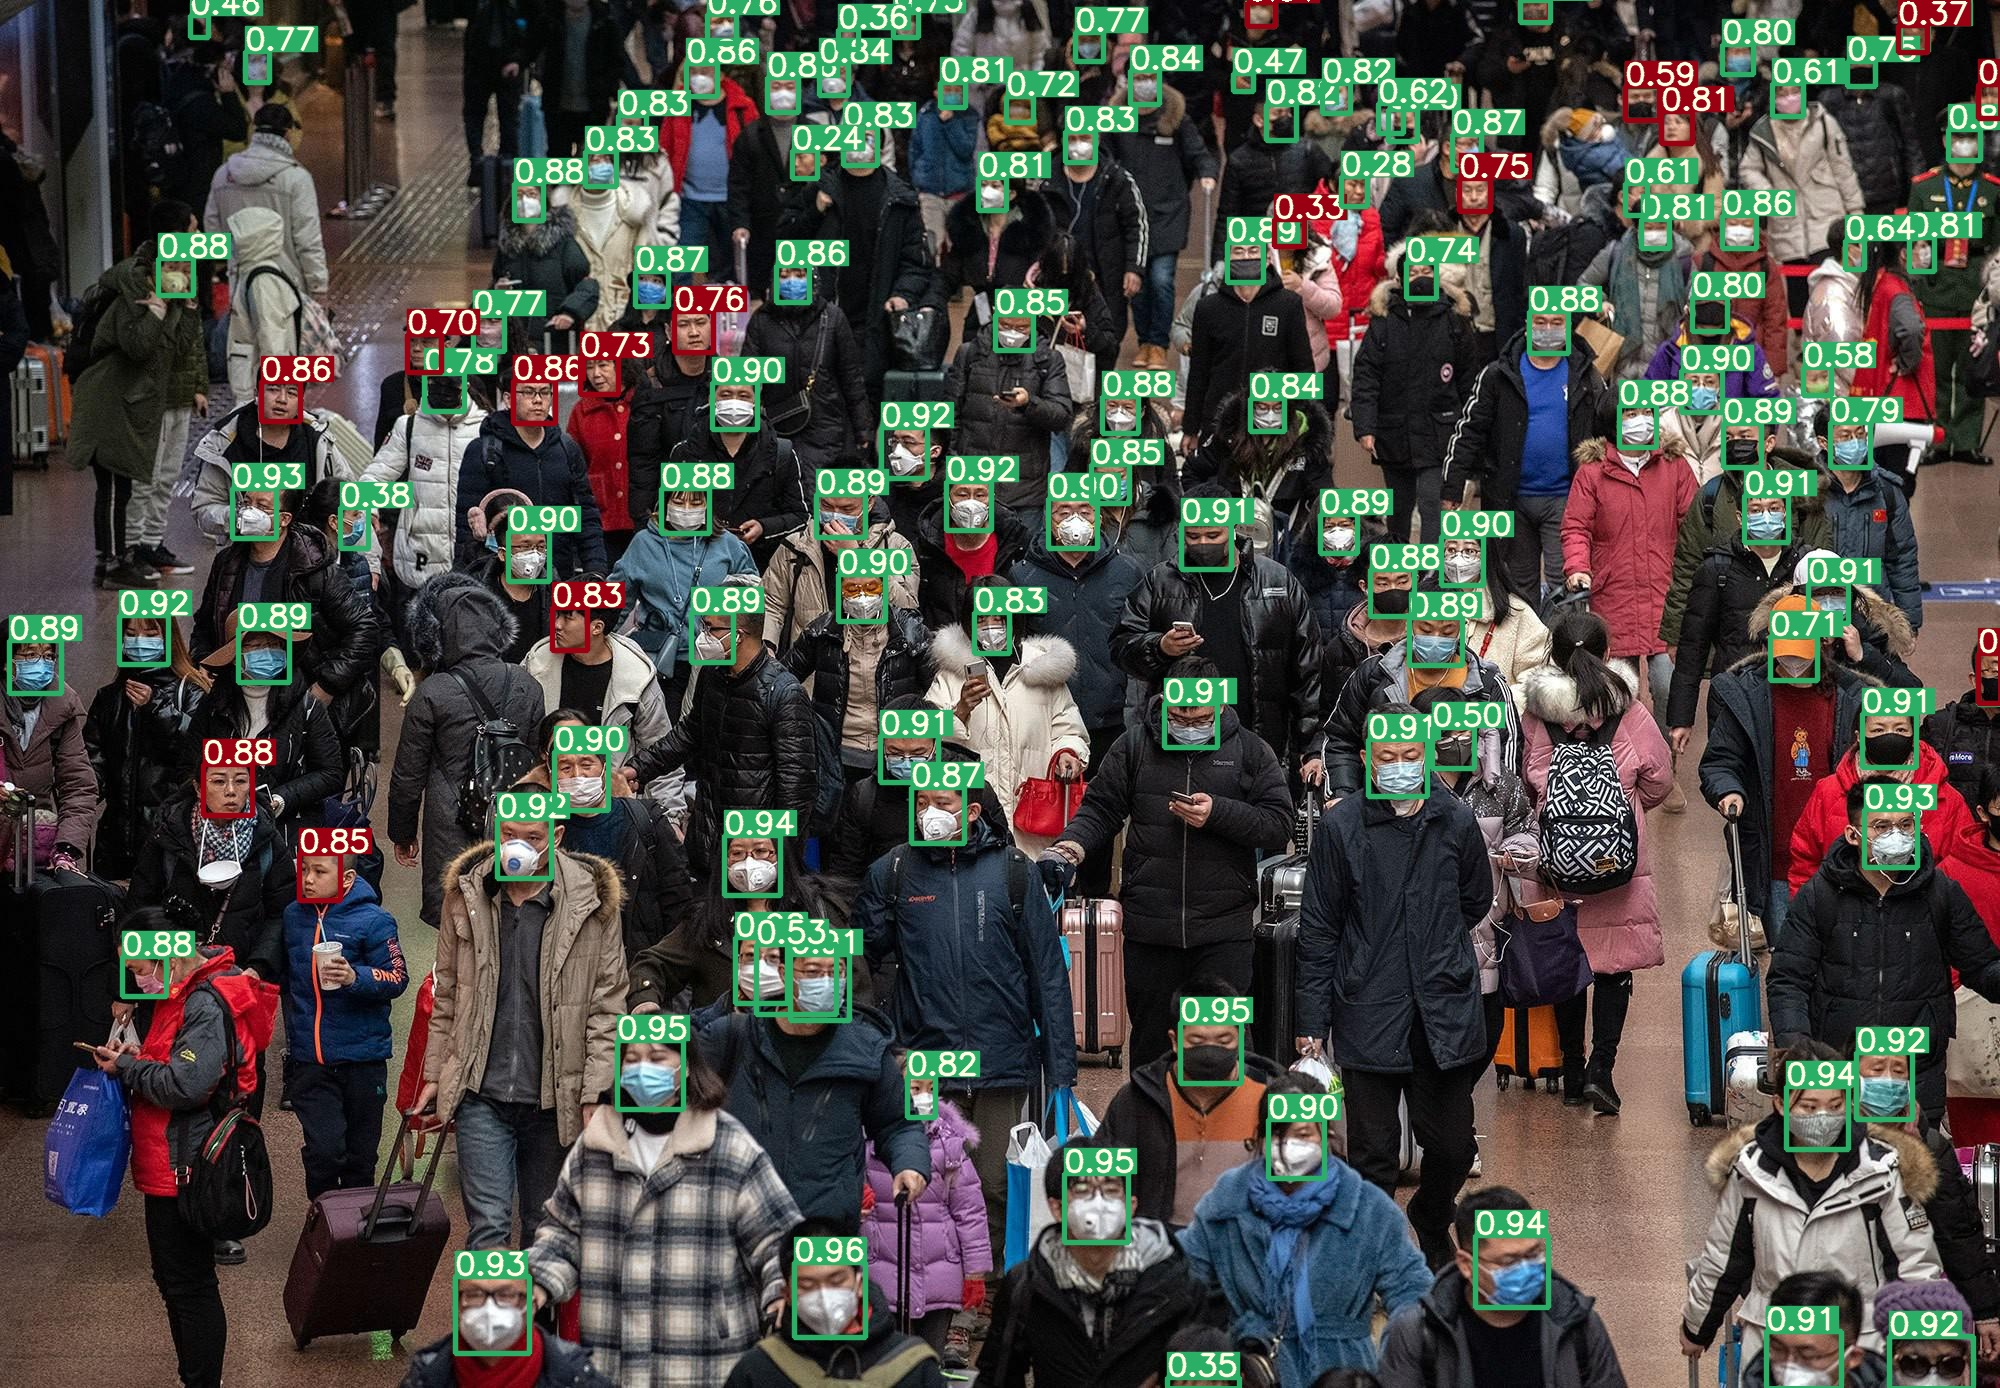

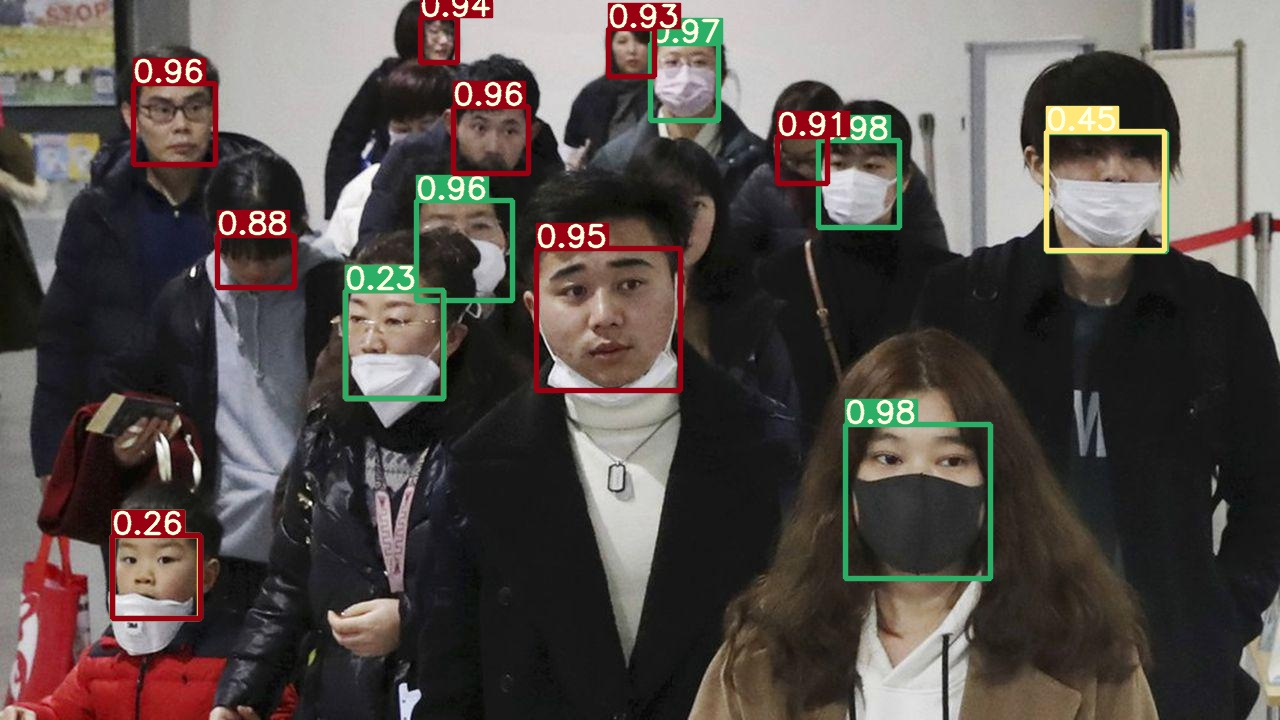

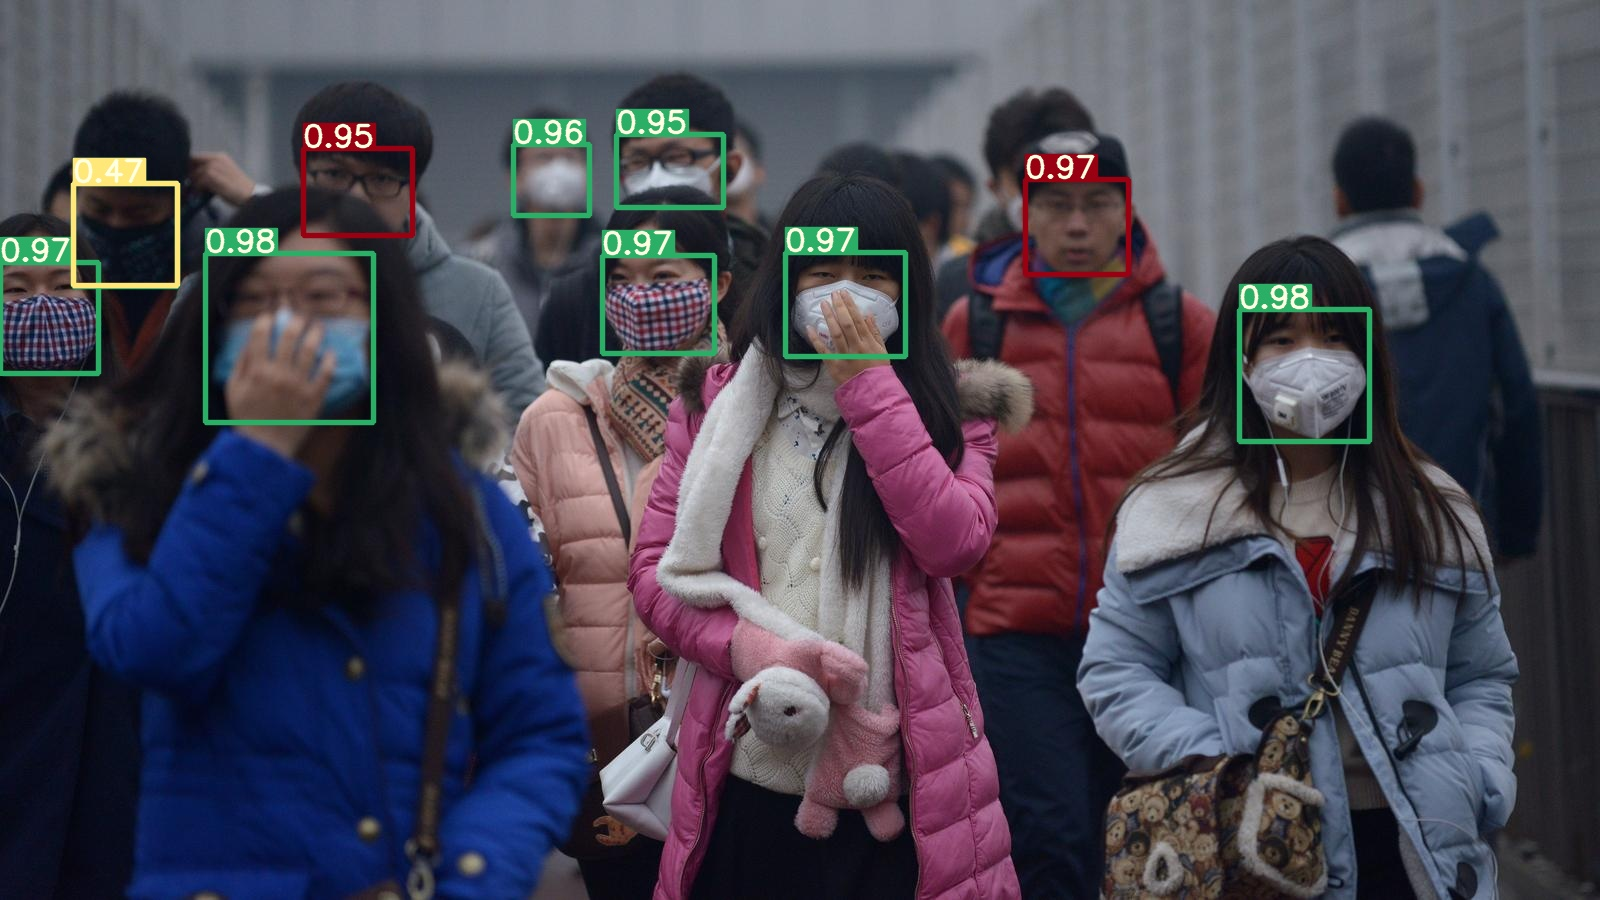

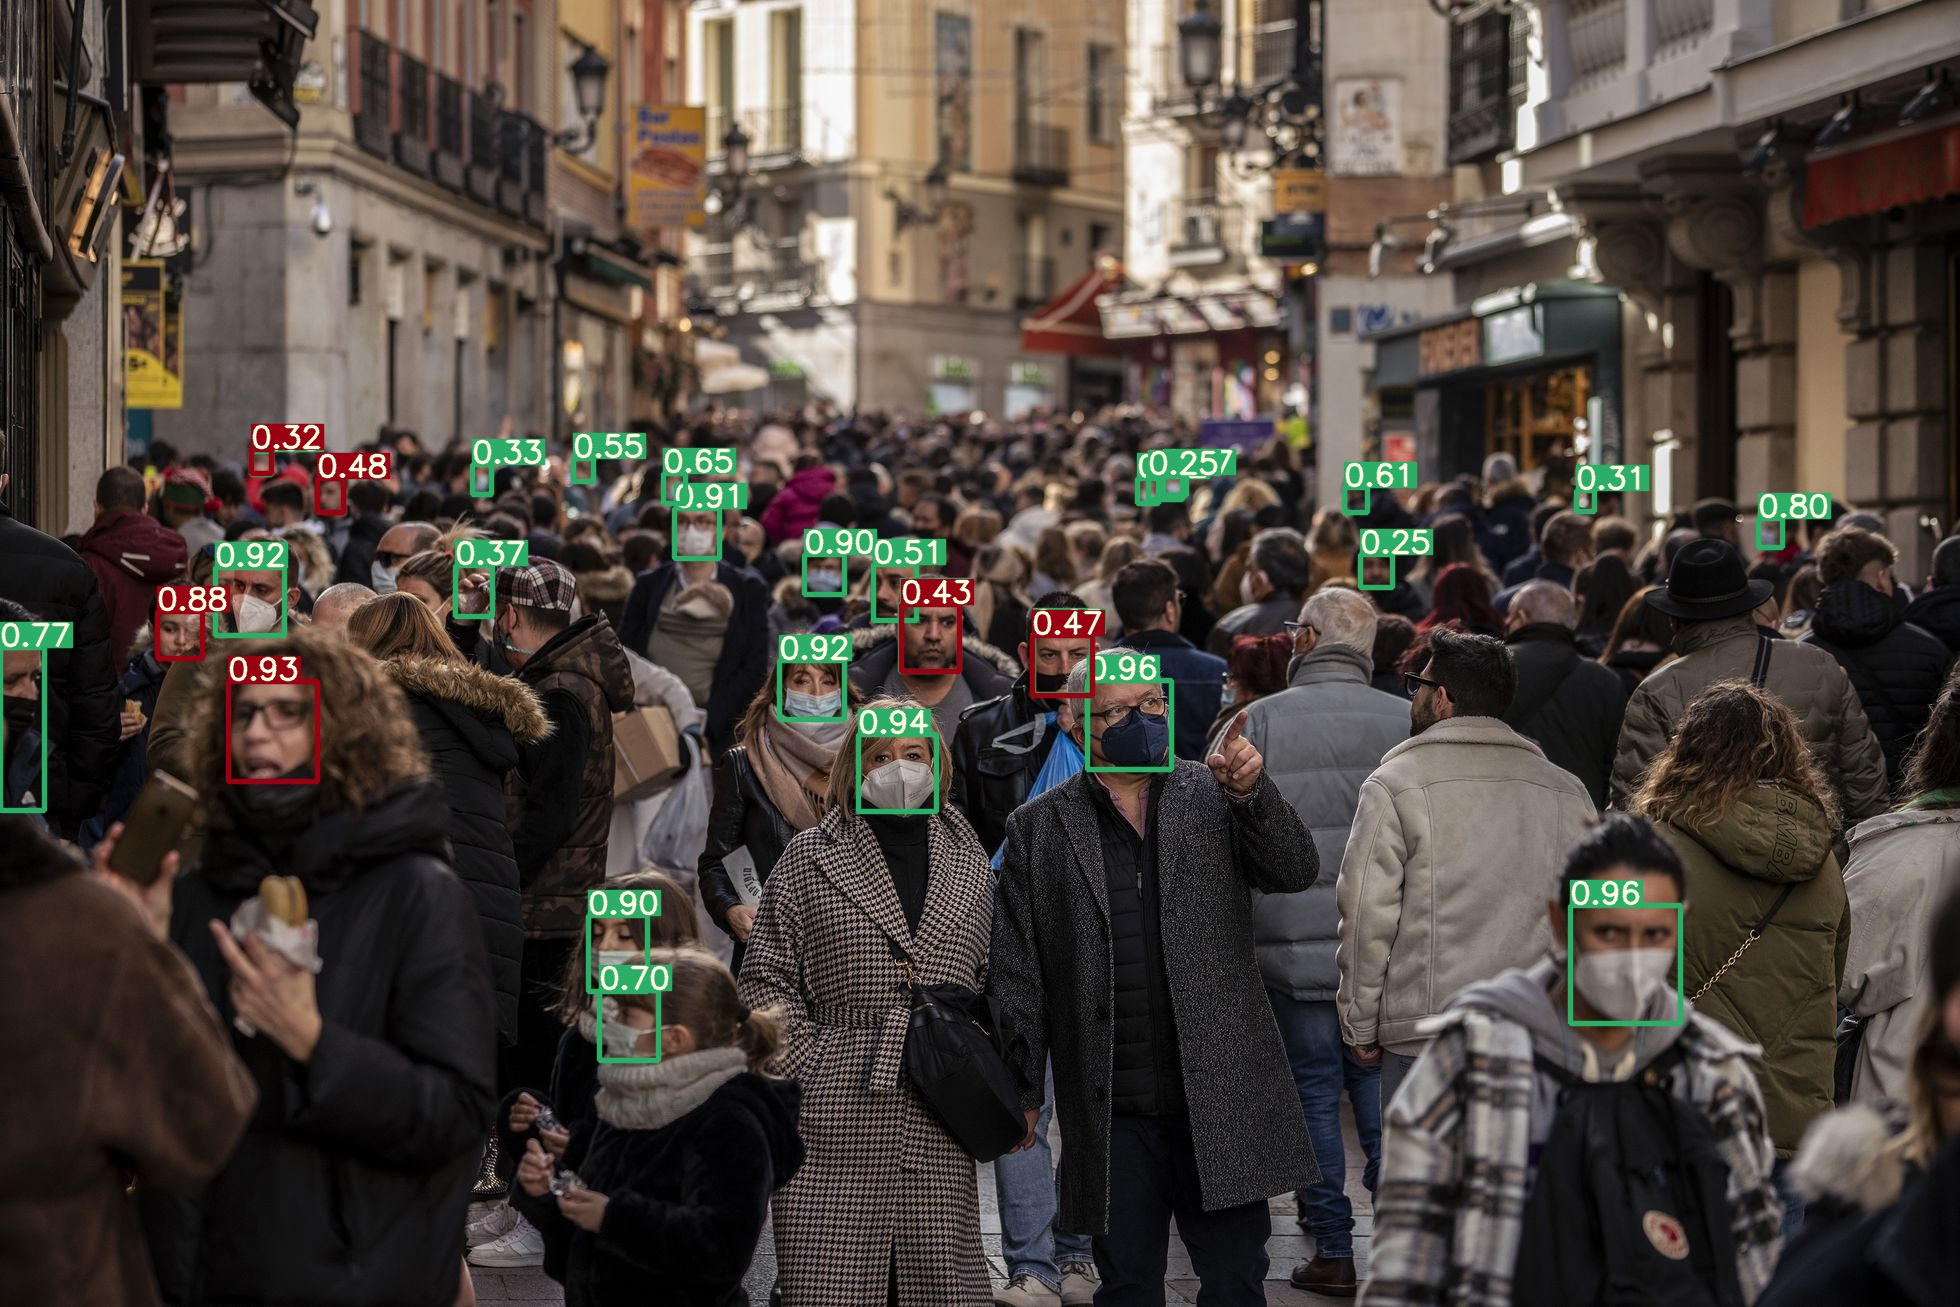

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('./inference/output/*'):
    display(Image(filename=imageName))
    print("\n")